<a href="https://colab.research.google.com/github/Ashikgurung61/Ashikgurung61/blob/main/Codsoft_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1 CodSoft
Movie Genre Classification |
Dataset : https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb




In [ ]:
import numpy as np
import pandas as pd

#Read the file

In [ ]:
D_train = pd.read_csv("/content/train_data.txt", sep = ":::", names = ['TITLE','GENRE','DESCRIPTION'])

<ipython-input-2-8c7a59d40acf>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  D_train = pd.read_csv("/content/train_data.txt", sep = ":::", names = ['TITLE','GENRE','DESCRIPTION'])


In [ ]:
D_train

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
4758,Angshumaner Chhobi (2009),drama,"Angshuman, a young film director, comes back ..."
4759,Kamerayla Izdivac (2010),documentary,The film shows us the unknown face of TV worl...
4760,Lost: 2010 PaleyFest (2010),talk-show,The exclusive release of the PaleyFest2010 li...
4761,Oy Vey! My Son Is Gay!! (2009),comedy,A romantic comedy featuring a Jewish family w...


In [ ]:
D_test = pd.read_csv("/content/test_data.txt", sep=":::", names = ["ID","TITLE","DESCRIPTION"])

<ipython-input-4-299b8f697a39>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  D_test = pd.read_csv("/content/test_data.txt", sep=":::", names = ["ID","TITLE","DESCRIPTION"])


In [ ]:
D_test

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
4904,4905,Composer Alive: Eastern Expressions (2007),Composer Alive: Eastern Expressions explores ...
4905,4906,At Meydani Hippodrome (2011),This 70 minutes documentary tells 10 differen...
4906,4907,Taking the Hill (2006),An intensely honest and hope-filled documenta...
4907,4908,Dreaming for You (2009),"Adam, a lonely young actor living in New York..."


In [ ]:
D_train.describe()

,TITLE,GENRE,DESCRIPTION
count,4762,4762,4762
unique,4762,27,4760
top,Oscar et la dame rose (2009),drama,"Held since 2005, Film Spring Open-Air has bee..."
freq,1,1188,2


In [ ]:
D_test.describe()

,ID
count,4909.000000
mean,2455.000000
std,1417.250566
min,1.000000
25%,1228.000000
50%,2455.000000
75%,3682.000000
max,4909.000000


#Check whether there is a noice or null data in a field

In [ ]:
D_train.isna()

,TITLE,GENRE,DESCRIPTION
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
4758,False,False,False
4759,False,False,False
4760,False,False,False
4761,False,False,False


In [ ]:
D_test.isna()

,ID,TITLE,DESCRIPTION
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
4904,False,False,False
4905,False,False,False
4906,False,False,False
4907,False,False,False


In [ ]:
D_train.isna().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [ ]:
D_test.isna().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [ ]:
D_train.shape

(4762, 3)

In [ ]:
D_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4762 entries, 1 to 4762
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        4762 non-null   object
 1   GENRE        4762 non-null   object
 2   DESCRIPTION  4762 non-null   object
dtypes: object(3)
memory usage: 148.8+ KB


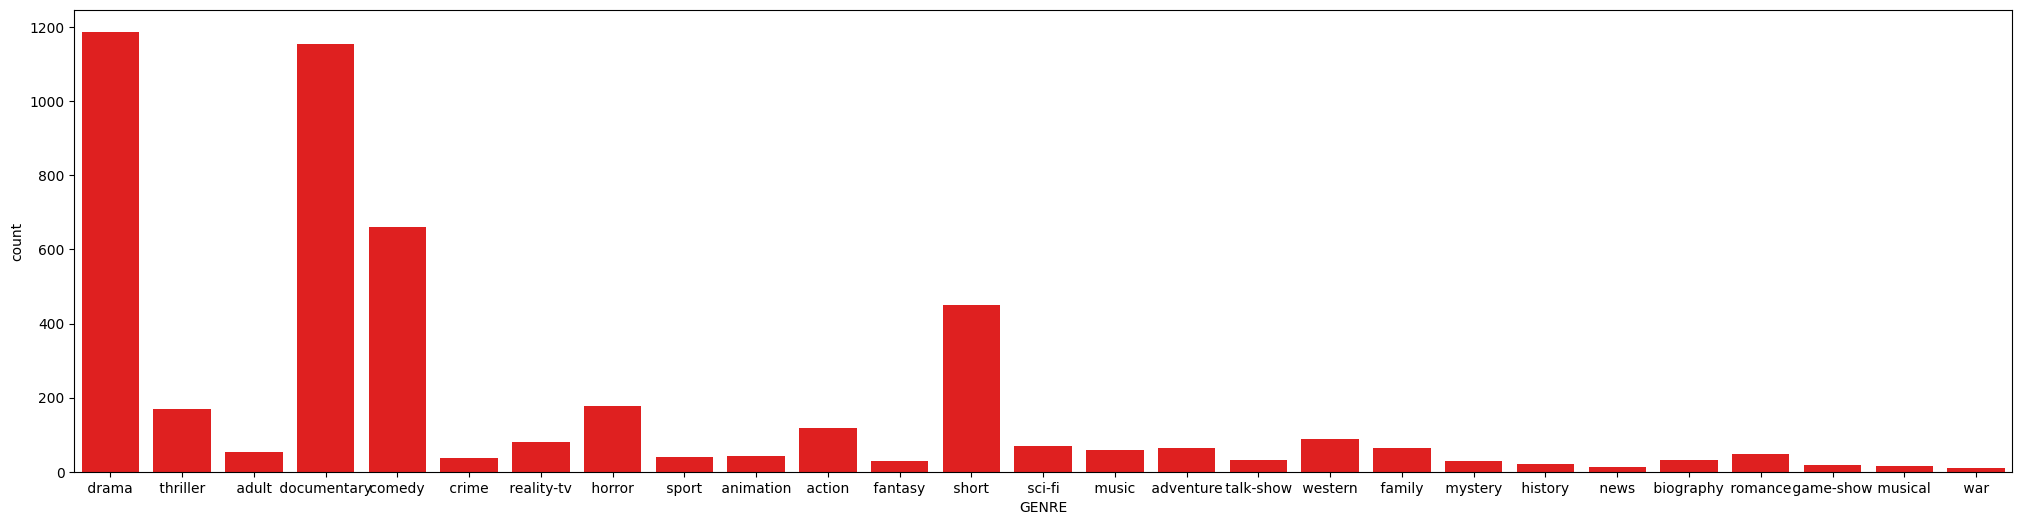

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,6))
sns.countplot(data=D_train, x="GENRE", color = "red")
plt.show()

#Data Cleaning and Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer

#Download Stopwords

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
wnl = WordNetLemmatizer()
stemmer = LancasterStemmer()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words("english"))
import string

def preproc(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([word for word in text if word not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

D_train["Clean_Description"] = D_train["DESCRIPTION"].apply(preproc)
D_test["Clean_Description"] = D_test["DESCRIPTION"].apply(preproc)

In [ ]:
D_train

,TITLE,GENRE,DESCRIPTION,Clean_Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
4758,Angshumaner Chhobi (2009),drama,"Angshuman, a young film director, comes back ...",angshuman young film director comes back italy...
4759,Kamerayla Izdivac (2010),documentary,The film shows us the unknown face of TV worl...,film shows unknown face world popular show tur...
4760,Lost: 2010 PaleyFest (2010),talk-show,The exclusive release of the PaleyFest2010 li...,exclusive release paleyfest live event honorin...
4761,Oy Vey! My Son Is Gay!! (2009),comedy,A romantic comedy featuring a Jewish family w...,romantic comedy featuring jewish family strugg...


In [ ]:
#D_train.drop(['TextCleaning'],axis = 1,inplace = True)

In [ ]:
D_train

,TITLE,GENRE,DESCRIPTION,Clean_Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
4758,Angshumaner Chhobi (2009),drama,"Angshuman, a young film director, comes back ...",angshuman young film director comes back italy...
4759,Kamerayla Izdivac (2010),documentary,The film shows us the unknown face of TV worl...,film shows unknown face world popular show tur...
4760,Lost: 2010 PaleyFest (2010),talk-show,The exclusive release of the PaleyFest2010 li...,exclusive release paleyfest live event honorin...
4761,Oy Vey! My Son Is Gay!! (2009),comedy,A romantic comedy featuring a Jewish family w...,romantic comedy featuring jewish family strugg...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf = TfidfVectorizer()
x_train = tf.fit_transform(D_train['Clean_Description'])
y_test = tf.fit_transform(D_test['Clean_Description'])

In [ ]:
x = x_train
y = D_train['GENRE']

In [ ]:
x

<4762x32460 sparse matrix of type '<class 'numpy.float64'>'
	with 231151 stored elements in Compressed Sparse Row format>

In [ ]:
y

1              drama 
2           thriller 
3              adult 
4              drama 
5              drama 
            ...      
4758           drama 
4759     documentary 
4760       talk-show 
4761          comedy 
4762     documentary 
Name: GENRE, Length: 4762, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state = 30)

#Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Train_scores = lr.score(X_train, y_train)
print("Accuracy ", Train_scores * 100)

Accuracy  66.6054082436335


In [ ]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([' documentary ', ' documentary ', ' documentary ', ' drama ',
       ' drama ', ' drama ', ' documentary ', ' drama ', ' documentary ',
       ' drama ', ' documentary ', ' documentary ', ' documentary ',
       ' documentary ', ' drama ', ' drama ', ' documentary ', ' drama ',
       ' documentary ', ' documentary ', ' drama ', ' documentary ',
       ' drama ', ' drama ', ' drama ', ' comedy ', ' documentary ',
       ' comedy ', ' short ', ' drama ', ' documentary ', ' documentary ',
       ' drama ', ' documentary ', ' drama ', ' documentary ',
       ' documentary ', ' documentary ', ' documentary ', ' documentary ',
       ' documentary ', ' documentary ', ' drama ', ' drama ', ' comedy ',
       ' drama ', ' drama ', ' drama ', ' documentary ', ' comedy ',
       ' drama ', ' drama ', ' drama ', ' documentary ', ' documentary ',
       ' documentary ', ' documentary ', ' documentary ', ' documentary ',
       ' documentary ', ' documentary ', ' drama ', ' documentary ',
 

In [ ]:
ac = accuracy_score(y_test, y_test_pred)
print("Accuracy: ", ac * 100)

Accuracy:  48.79328436516264


#Support Vector Machine

In [ ]:
from sklearn.svm import SVC
Support = SVC()

In [ ]:
Support.fit(X_train, y_train)

SVC()

In [ ]:
Support.score(X_train, y_train)

0.8647939091625099

In [ ]:
y_test_preds = Support.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_test_preds)
print("Accuracy: ", accuracy * 100)

Accuracy:  47.53410283315845
